In [2]:
import folium
from datosgobmx import client
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from math import sqrt


plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

In [175]:
dir_pcs = '../data/processed/'
aqip_mx = pd.read_csv(dir_pcs+'aqip/MX_PM10_2017-2020.csv', encoding='latin_1').set_index('Date')
cty_aqip = [c for c in aqip_mx.columns]

In [ ]:
for i in range(1,len(cty_aqip)):
    print (cty_aqip[i])

In [3]:
def pollutant(p):
    """Function that returns a str with a pollutant.

    Args:
        p (int): values from 0 to 5 for list place.

    Returns:
        str: pollutant.
    """
    #Parametros de contaminantes
    param = ['CO','NO2', 'O3','PM10','SO2']
    return (param[p])

def city_valid_aqip(pollutant):
    stat_mx = pd.read_csv('../data/processed/aqip/MX_StatRes_2017-2020.csv', encoding='latin_1').set_index('City')
    stat_mx = stat_mx[stat_mx['Specie']==pollutant]
    stat_mx = stat_mx[stat_mx['Pctg']>=0.75]
    
    city_list = stat_mx.index.tolist()
    
    return (city_list)

def catch_outliers(pollutant):
    outlier = {'PM10':464, 'O3':454, 'CO':22,
               'PM25':300, 'SO2':195,'NO2':420}
    
    return (outlier[pollutant])

'''def aqip_yearly():
    """Creates a graph that compares the air quality data for each pollutant from 2017 to 2020

    Args:
        city (str): code for the city to be analysed, for example: cdmx
    """
    dir_pcs = '../data/processed/aqip/'
    dir_fig = '../output/figures/aqip_yearly/v2/'


    years = [2017, 2018, 2019, 2020] #Years to be referenced
    
    
    for i in range(5):
        
        aqip_mx = pd.read_csv(dir_pcs+'MX_'+pollutant(i)+'_'+str(years[0])+'-'+str(years[len(years)-1])+'_raw.csv',
                 encoding='latin_1')
        
        aqip_mx['Date'] = pd.to_datetime(aqip_mx['Date'])
        
        aqip_mx = aqip_mx.set_index('Date')
        
        cty_aqip = city_valid_aqip(pollutant(i))
        
        
        for c in cty_aqip:
            
            cty_data = aqip_mx.loc[:,c]
            
            cty_data = cty_data.reset_index()
        
            ax = plt.gca()

            for y in years:
                
                filter_year=cty_data[cty_data['Date'].dt.year==y]
                
                #print (filter_year)

                filter_year['Date'] = filter_year['Date'].dt.strftime('%m-%d')

                #print(filter_year)

                filter_year.plot(x='Date',y=c, color=year_dict[y], label = str(y), ax=ax)
                #filter_year['Date'].dt.strftime('%m-%d').plot(x='Date',y=c, color=year_dict[y], label = str(y), ax=ax)
            
            plt.ylabel('Concentration: '+pollutant(i))

            plt.savefig(dir_fig+c+'_Year_Compare_'+pollutant(i)+'.png')

            ax.clear()'''

'def aqip_yearly():\n    """Creates a graph that compares the air quality data for each pollutant from 2017 to 2020\n\n    Args:\n        city (str): code for the city to be analysed, for example: cdmx\n    """\n    dir_pcs = \'../data/processed/aqip/\'\n    dir_fig = \'../output/figures/aqip_yearly/v2/\'\n\n\n    years = [2017, 2018, 2019, 2020] #Years to be referenced\n    \n    \n    for i in range(5):\n        \n        aqip_mx = pd.read_csv(dir_pcs+\'MX_\'+pollutant(i)+\'_\'+str(years[0])+\'-\'+str(years[len(years)-1])+\'_raw.csv\',\n                 encoding=\'latin_1\')\n        \n        aqip_mx[\'Date\'] = pd.to_datetime(aqip_mx[\'Date\'])\n        \n        aqip_mx = aqip_mx.set_index(\'Date\')\n        \n        cty_aqip = city_valid_aqip(pollutant(i))\n        \n        \n        for c in cty_aqip:\n            \n            cty_data = aqip_mx.loc[:,c]\n            \n            cty_data = cty_data.reset_index()\n        \n            ax = plt.gca()\n\n            for y in 

In [171]:
def catch_outliers(pollutant):
    outlier = {'PM10':464, 'O3':454, 'CO':22,
               'PM25':300, 'SO2':100,'NO2':420}
    
    return (outlier[pollutant])

In [185]:
def aqip_yearly():
    """Creates a graph that compares the air quality data for each pollutant from 2017 to 2020

    Args:
        city (str): code for the city to be analysed, for example: cdmx
    """
    dir_pcs = '../data/processed/aqip/'
    dir_fig = '../output/figures/aqip_yearly/v2/'


    years = [2017, 2018, 2019, 2020] #Years to be referenced
    
    
    for i in range(5):
        
        aqip_mx = pd.read_csv(dir_pcs+'MX_'+pollutant(i)+'_'+str(years[0])+'-'+str(years[len(years)-1])+'_raw.csv',
                 encoding='latin_1')
        
        aqip_mx['Date'] = pd.to_datetime(aqip_mx['Date'])
        
        #aqip_mx = aqip_mx.set_index('Date')
        
        cty_aqip = city_valid_aqip(pollutant(i))
        
        outlier = catch_outliers(pollutant(i))
        
        plt.figure(figsize=(15,7.5)) 
        
        
        for c in cty_aqip:
        
            ax = plt.gca()

            for y in years:
                
                pt=aqip_mx[aqip_mx['Date'].dt.year==y]
                pt= pt.set_index(pt['Date'].dt.strftime('%m-%d'))
                pt = pd.DataFrame(pt[c])
                
                pt = pt[pt[c]<=outlier]
                
                pt.plot(y=c,ax=ax, label=y)
    
            ticklabes=['Ene','Feb','Mar','Abr','May','Jun']
            tickplace = [30*n for n in range(6)]
            ax.set_xticks(tickplace)
            ax.set_xticklabels(ticklabels) #add monthlabels to the xaxis

            plt.ylabel('Concentración: '+pollutant(i))
            plt.xlabel('Fecha')

            plt.savefig(dir_fig+c+'_Year_Compare_'+pollutant(i)+'.png', dpi=300)

            ax.clear()

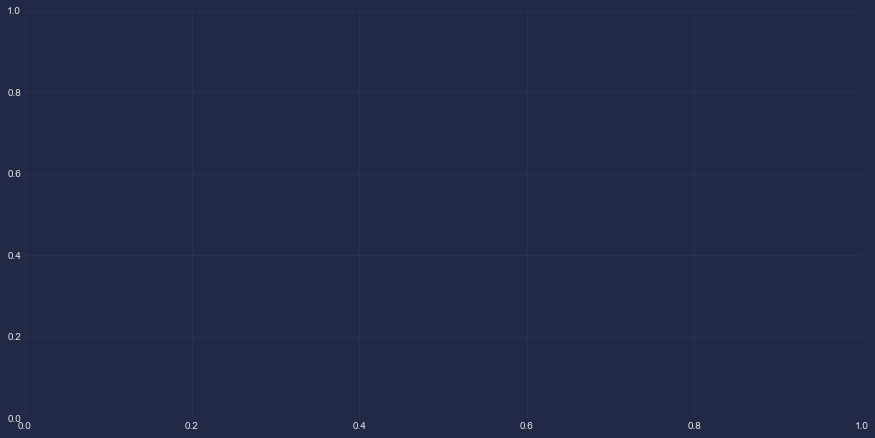

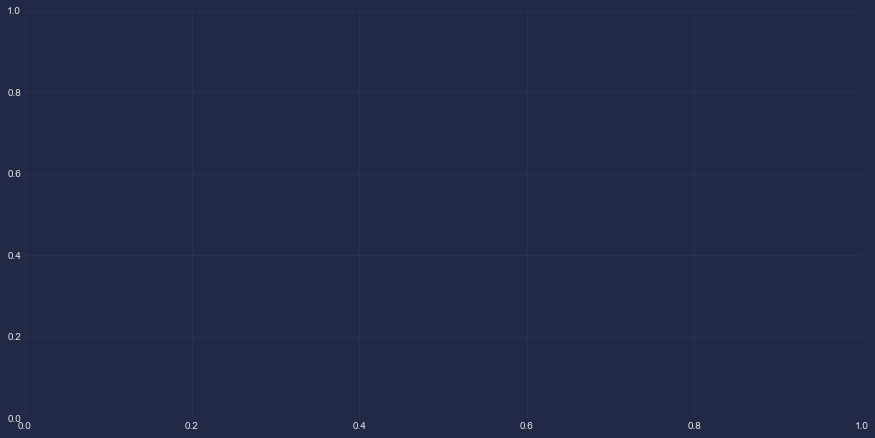

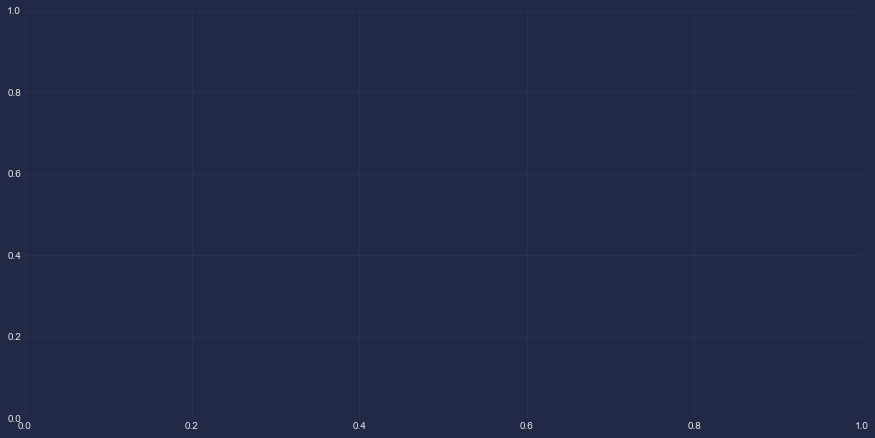

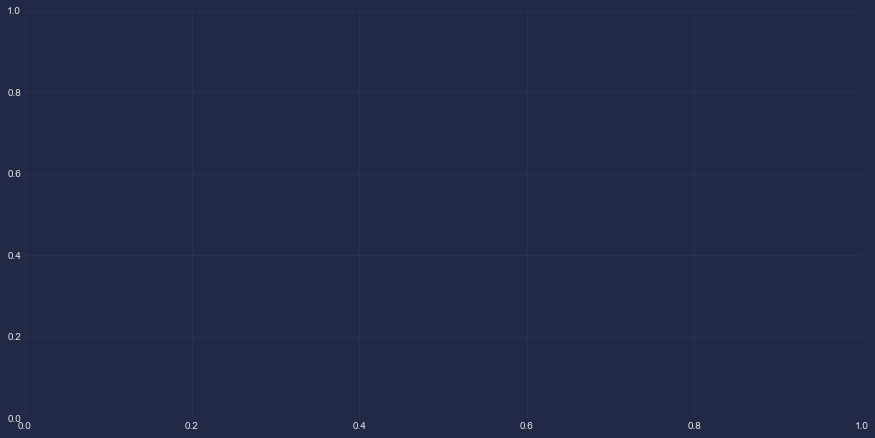

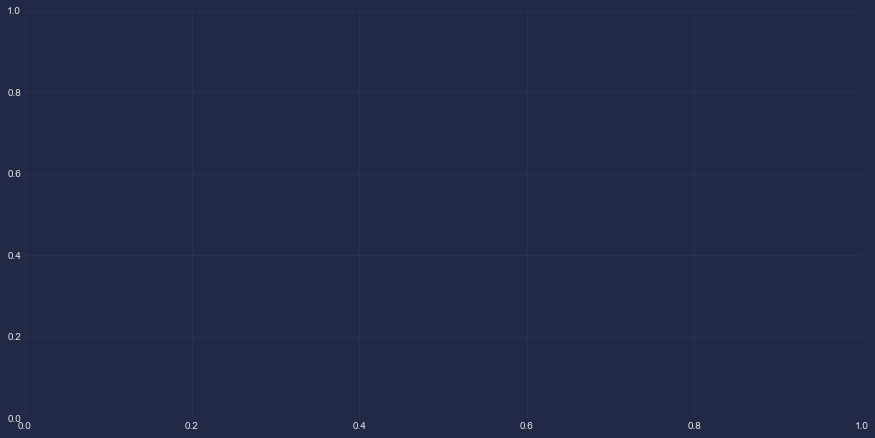

In [188]:
aqip_yearly()

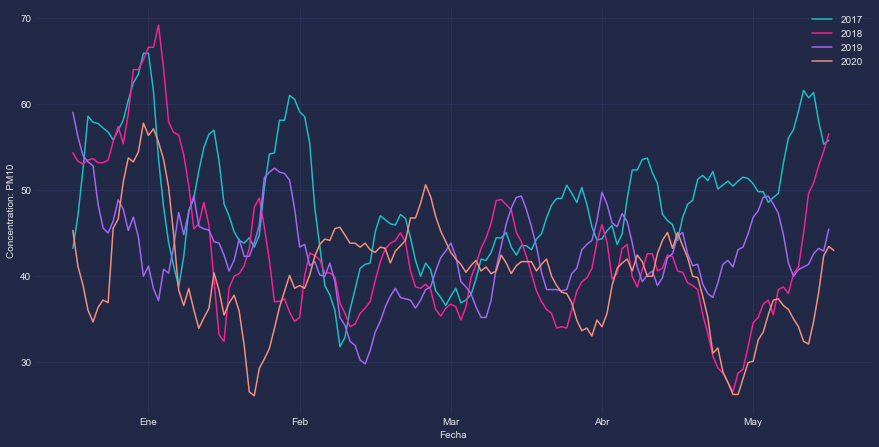

In [10]:
dir_pcs = '../data/processed/'
aqip_mx = pd.read_csv(dir_pcs+'aqip/MX_PM10_2017-2020.csv', encoding='latin_1').set_index('Date')

aqip_mx = aqip_mx.reset_index()
aqip_mx['Date'] = pd.to_datetime(aqip_mx['Date'])
#aqip_mx = aqip_mx.set_index('Date')

plt.figure(figsize=(15,7.5))  

for y in range(2017,2021):
    pt=aqip_mx[aqip_mx['Date'].dt.year==y]
    pt = pt.set_index(pt['Date'].dt.strftime('%m-%d'))
    pt = pd.DataFrame(pt['Guadalajara'])
    
    #pt2 = pd.pivot_table(pt, index=pt.index.month, columns=pt.index.day)
    #pt2.columns = pt2.columns.droplevel() # remove the double header (0) as pivot creates a multiindex.
    #print(pt2)
    
    #pt = pt.set_index(pt['Date'].dt.strftime('%m-%d'))
    #pd.to_datetime(pt.index)
    #print(pt.index.month)
    
    ax=plt.gca()
    pt.plot( y='Guadalajara',ax=ax, label=y)
    
    ticklabels=['Ene','Feb','Mar','Abr','May']
    tickplace = [15+30*n for n in range(5)]
    ax.set_xticks(tickplace)
    ax.set_xticklabels(ticklabels) #add monthlabels to the xaxis
    
    plt.ylabel('Concentration: PM10')
    plt.xlabel('Fecha')
    
dir_fig = '../output/figures/aqip_yearly/v2/'



  

#plt.savefig(dir_fig+'TEST.png', dpi=300)
    
#aqip_mx = aqip_mx.set_index(aqip_mx['Date'].dt.strftime('%m-%d'))
#pt = pd.DataFrame(aqip_mx['Guadalajara'])
#pt


    
    

In [ ]:
'''
pt = pd.pivot_table(aqip_mx, index=aqip_mx.index.day, columns=aqip_mx.index.month, aggfunc='sum')
pt.columns = pt.columns.droplevel() # remove the double header (0) as pivot creates a multiindex.

ax = plt.figure().add_subplot(111)
ax.plot(pt)

ticklabels = [datetime.date(1900, item, 1).strftime('%b') for item in pt.index]
ax.set_xticks(np.arange(1,5))
ax.set_xticklabels(ticklabels) #add monthlabels to the xaxis

ax.legend(pt.columns.tolist(), loc='center left', bbox_to_anchor=(1, .5)) #add the column names as legend.
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()
'''

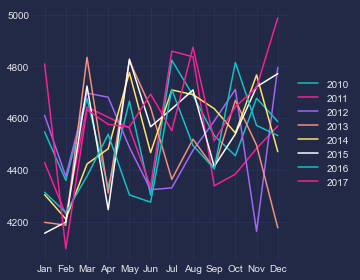

In [115]:
import numpy as np
import datetime
# dummy data (Days)
dates_d = pd.date_range('2010-01-01', '2017-12-31', freq='D')
df_year = pd.DataFrame(np.random.randint(100, 200, (dates_d.shape[0], 1)), columns=['Data'])
df_year.index = dates_d #set index

pt = pd.pivot_table(df_year, index=df_year.index.month, columns=df_year.index.year, aggfunc='sum')
pt.columns = pt.columns.droplevel() # remove the double header (0) as pivot creates a multiindex.

ax = plt.figure().add_subplot(111)
ax.plot(pt)

ticklabels = [datetime.date(1900, item, 1).strftime('%b') for item in pt.index]
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(ticklabels) #add monthlabels to the xaxis

ax.legend(pt.columns.tolist(), loc='center left', bbox_to_anchor=(1, .5)) #add the column names as legend.
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()


In [116]:
ticklabels


['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']